In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

2023-09-05 09:49:31.514957: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

In [6]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

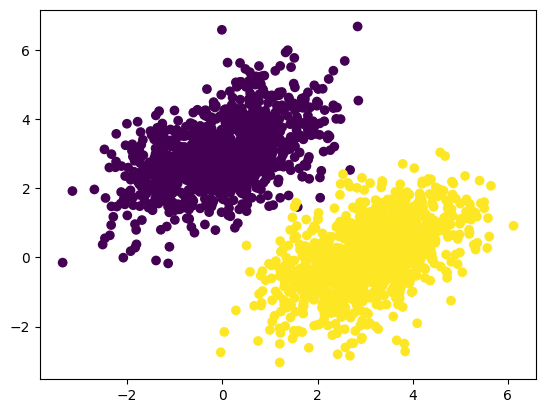

In [7]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [8]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [9]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [10]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [19]:
lr = 0.1

predictions = None

def training_step(inputs, targets):
    global predictions

    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * lr)
    b.assign_sub(grad_loss_wrt_b * lr)

    return loss

In [20]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0255
Loss at step 1: 0.0255
Loss at step 2: 0.0255
Loss at step 3: 0.0255
Loss at step 4: 0.0255
Loss at step 5: 0.0255
Loss at step 6: 0.0255
Loss at step 7: 0.0255
Loss at step 8: 0.0255
Loss at step 9: 0.0255
Loss at step 10: 0.0255
Loss at step 11: 0.0255
Loss at step 12: 0.0255
Loss at step 13: 0.0255
Loss at step 14: 0.0255
Loss at step 15: 0.0255
Loss at step 16: 0.0255
Loss at step 17: 0.0255
Loss at step 18: 0.0255
Loss at step 19: 0.0255
Loss at step 20: 0.0255
Loss at step 21: 0.0255
Loss at step 22: 0.0254
Loss at step 23: 0.0254
Loss at step 24: 0.0254
Loss at step 25: 0.0254
Loss at step 26: 0.0254
Loss at step 27: 0.0254
Loss at step 28: 0.0254
Loss at step 29: 0.0254
Loss at step 30: 0.0254
Loss at step 31: 0.0254
Loss at step 32: 0.0254
Loss at step 33: 0.0254
Loss at step 34: 0.0254
Loss at step 35: 0.0254
Loss at step 36: 0.0254
Loss at step 37: 0.0254
Loss at step 38: 0.0254
Loss at step 39: 0.0254


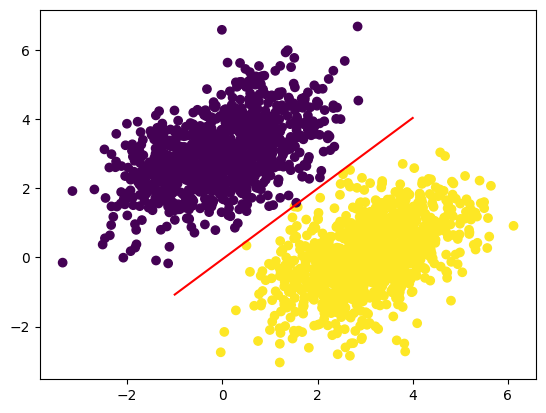

In [21]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)